In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Dell\\DataScience_Workbench\\Final Project\\healthcare_reviews.csv")
df.head()

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3


In [3]:
import nltk
from nltk.corpus import stopwords
import re

df = pd.read_csv("C:\\Users\\Dell\\DataScience_Workbench\\Final Project\\healthcare_reviews.csv")

# Remove missing values
df.dropna(subset=['Review_Text'], inplace=True)

# Text preprocessing: tokenization, removing punctuation, and stopwords
nltk.download('stopwords')  # Download the stopwords if you haven't already

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = nltk.word_tokenize(text)  # Tokenization
    tokens = [word.lower() for word in tokens if word.isalnum()]  # Remove non-alphanumeric tokens
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

df['Cleaned_Review'] = df['Review_Text'].apply(clean_text)

# Save the preprocessed data to a new CSV file (optional)
df.to_csv('preprocessed_healthcare_reviews.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import numpy as np
def create_sentiment(rating):
    if rating==1 or rating==2:
        return -1
    elif rating==4 or rating==5:
        return 1
    else:
        return 0
df['Sentiment'] = df['Rating'].apply(create_sentiment)

In [5]:
df.head()

,Review_Text,Rating,Cleaned_Review,Sentiment
0,I have mixed feelings about my experience.,4,mixed feelings experience,1
1,The staff was caring and attentive. I couldn't...,5,staff caring attentive couldnt happier,1
2,I have mixed feelings about my experience.,5,mixed feelings experience,1
3,I have mixed feelings about my experience.,5,mixed feelings experience,1
4,The healthcare provider was excellent. I had a...,3,healthcare provider excellent great experience,0


In [6]:
#Check for Missing Values
missing_values = df['Review_Text'].isna().sum()
print("Number of missing values:", missing_values)

Number of missing values: 0


In [7]:
#Filter out Non-String Values
df = df.dropna(subset=['Review_Text'])

In [8]:
#Convert Values to Strings
df['Review_Text'] = df['Review_Text'].astype(str)

In [9]:
"""#Handle Exception for Non-String Values
from sklearn.feature_extraction.text import re
def clean_data(Review_Text):
    no_punc=re.sub(r'[^\w\s]', '', Review_Text)
    no_digits =''.join([i for i in no_punc if not i.isdigit()])
    return(no_digits)"""

"#Handle Exception for Non-String Values\nfrom sklearn.feature_extraction.text import re\ndef clean_data(Review_Text):\n    no_punc=re.sub(r'[^\\w\\s]', '', Review_Text)\n    no_digits =''.join([i for i in no_punc if not i.isdigit()])\n    return(no_digits)"

In [10]:
df['Review_Text'][4]

'The healthcare provider was excellent. I had a great experience. '

In [12]:
df['Review_Text'][4]

'The healthcare provider was excellent. I had a great experience. '

In [13]:
#TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=None)
X=tfidf.fit_transform(df['Review_Text'])

In [14]:
df['Review_Text'][4]

'The healthcare provider was excellent. I had a great experience. '

In [15]:
#Machine_Learing
from sklearn.model_selection import train_test_split
y = df['Sentiment']
X_train, X_test,y_train,y_test = train_test_split(X,y)

In [16]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
preds=lr.predict(X_test)

In [17]:
preds

array([-1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
        1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1], d

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(preds,y_test)

0.43555555555555553

In [19]:
confusion_matrix(preds,y_test)

array([[27,  8, 25],
       [ 0,  0,  0],
       [70, 24, 71]], dtype=int64)

In [20]:
X_test

<225x52 sparse matrix of type '<class 'numpy.float64'>'
	with 1838 stored elements in Compressed Sparse Row format>

In [21]:
pd.DataFrame(X_test[1])

,0
0,"(0, 32)\t0.37607258212161776\n (0, 23)\t0.3..."


In [22]:
preds_1=lr.predict(X_test[0])

In [23]:
preds_1

array([-1], dtype=int64)

In [24]:
y_test

240   -1
55     0
431   -1
489    1
538    1
      ..
305    1
745   -1
529    0
507   -1
552    1
Name: Sentiment, Length: 225, dtype: int64

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Assuming your dataset has two columns: 'Review_Text' and 'Sentiment'
X = df['Review_Text']  # Text data
y = df['Sentiment']    # Sentiment labels (positive, negative, neutral)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(strip_accents=None, lowercase=True, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

# Predict sentiments on the test data
y_pred = naive_bayes.predict(X_test_tfidf)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[32  0 47]
 [ 8  0 17]
 [36  0 40]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.42      0.41      0.41        79
           0       0.00      0.00      0.00        25
           1       0.38      0.53      0.44        76

    accuracy                           0.40       180
   macro avg       0.27      0.31      0.29       180
weighted avg       0.35      0.40      0.37       180



C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


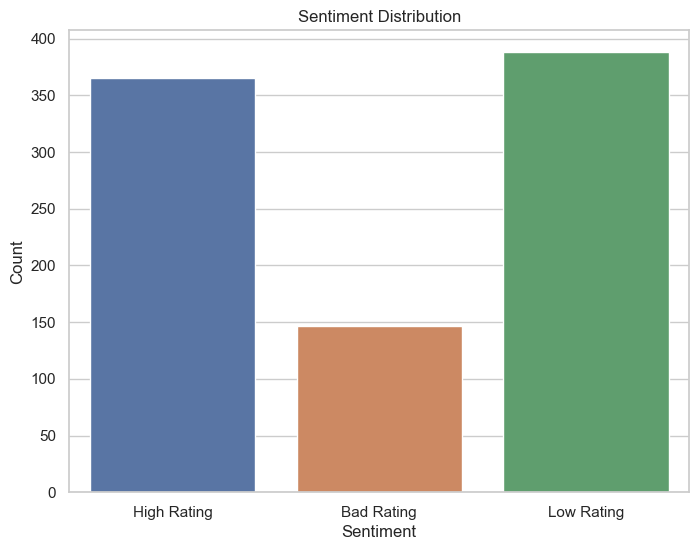

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mapping for renaming the values
sentiment_mapping = {-1: 'High Rating', 0: 'Bad Rating', 1: 'Low Rating'}

# Rename the 'Sentiment' column based on the mapping
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

# Create a countplot to visualize the data
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', order=['High Rating', 'Bad Rating', 'Low Rating'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


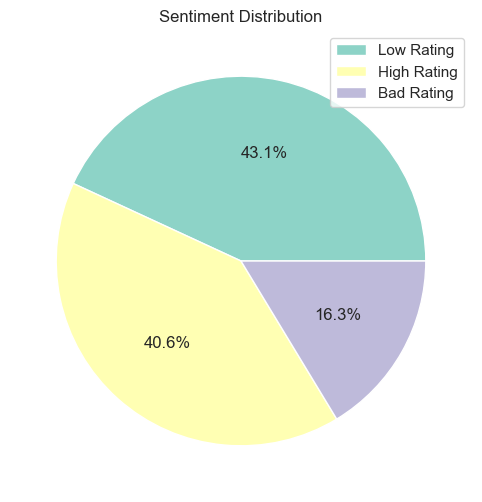

In [27]:
plt.figure(figsize=(8, 6))
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None, colors=sns.color_palette('Set3'))
plt.ylabel('')
plt.title('Sentiment Distribution')
plt.legend(labels=df['Sentiment'].value_counts().index, loc='upper right')
plt.show()


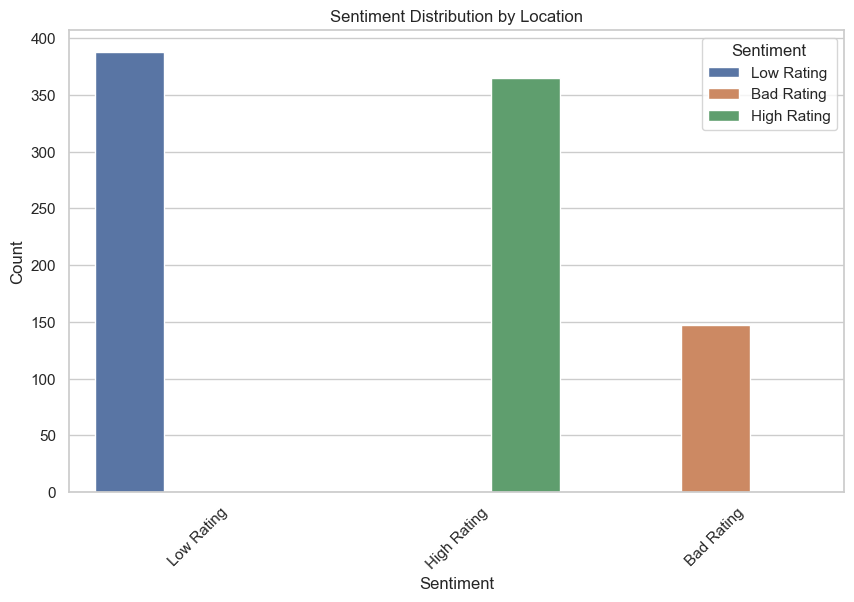

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', order=df['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Location')
plt.xticks(rotation=45)
plt.show()


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review_Text     900 non-null    object
 1   Rating          900 non-null    int64 
 2   Cleaned_Review  900 non-null    object
 3   Sentiment       900 non-null    object
dtypes: int64(1), object(3)
memory usage: 67.4+ KB


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("C:\\Users\\Dell\\DataScience_Workbench\\Final Project\\healthcare_reviews.csv")

# Remove missing values
df.dropna(subset=['Review_Text'], inplace=True)

# Assuming your dataset has two columns: 'Review_Text' and 'Sentiment'
X = df['Review_Text']  # Text data
y = df['Sentiment']    # Sentiment labels (positive, negative, neutral)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(strip_accents=None, lowercase=True, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

# Predict sentiments on the test data
y_pred = naive_bayes.predict(X_test_tfidf)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


KeyError: 'Sentiment'